## Метрические методы классификации


**Вариант:** 14

**Цель работы:** изучение принципов построения информационных систем с использованием метрических методов классификации.

**Задачи:**
- изучение инструментария Python для реализации алгоритмов метрической классификации;
- изучение методов оптимизации параметров метрической классификации;
- освоение модификаций kNN-метода.

### Теоретические сведения

Мной был выбран набор данных под названием "Diamonds" по ссылке https://www.kaggle.com/datasets/joebeachcapital/diamonds/data. Эти данные являются результатом анализа цены бриллианта на основе таких характеристик, как карат, огранка, цвет, чистота и размер.

1. ***carat*** - карат. Это мера веса бриллианта. Один карат равен 0,2 грамма.
2. ***clarity*** - ясность. Означает, насколько прозрачен бриллиант. Бриллианты часто содержат дефекты, такие как трещины или минеральные отложения. Чем меньше и менее заметны недостатки бриллианта, тем выше его чистота. Ясность содержит 8 упорядоченных уровней: от «I1» (худший) до «IF» (лучший).
3. ***color*** - цвет бриллианта. Бесцветные бриллианты считаются лучшими по сравнению с бриллиантами с желтым оттенком. Diamonds содержит бриллианты 7 разных цветов, представленных разными буквами. Бриллианты «D» — «F» считаются бесцветными, а бриллианты «G» — «J» имеют очень бледный цвет.
4. ***сut*** - огранка. Относится к тому, как необработанный алмаз превращается в готовый алмаз. Более качественная огранка создает более симметричные и блестящие бриллианты. ***Cut*** имеет 5 упорядоченных уровней: «Удовлетворительно», «Хорошо», «Очень хорошо», «Премиум», «Идеально».
5. ***x, y, z, depth, table (глубина и таблица)*** — это различные меры размера бриллианта в миллиметрах.
6. ***price*** - цена бриллианта.


### Загрузка данных

In [2]:
!pip install sklearn

  Using cached sklearn-0.0.post10.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2960 sha256=60787e7f0e73c1f3ce074c7f57d9a5563262b6f16e5aa7267d283f3fa41a6dab
  Stored in directory: c:\users\dns\appdata\local\pip\cache\wheels\b1\70\bc\4f2b2698e552905b6ba586cbb9f210df0dd75813576741bf90
Successfully built sklearn


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
data_path = "./diamonds/diamonds.csv"
data = pd.read_csv(data_path)
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Визуализация данных

После загрузки данных можно визуализировать полученный набор данных. Для визуализации будем использовать библиотеку seaborn

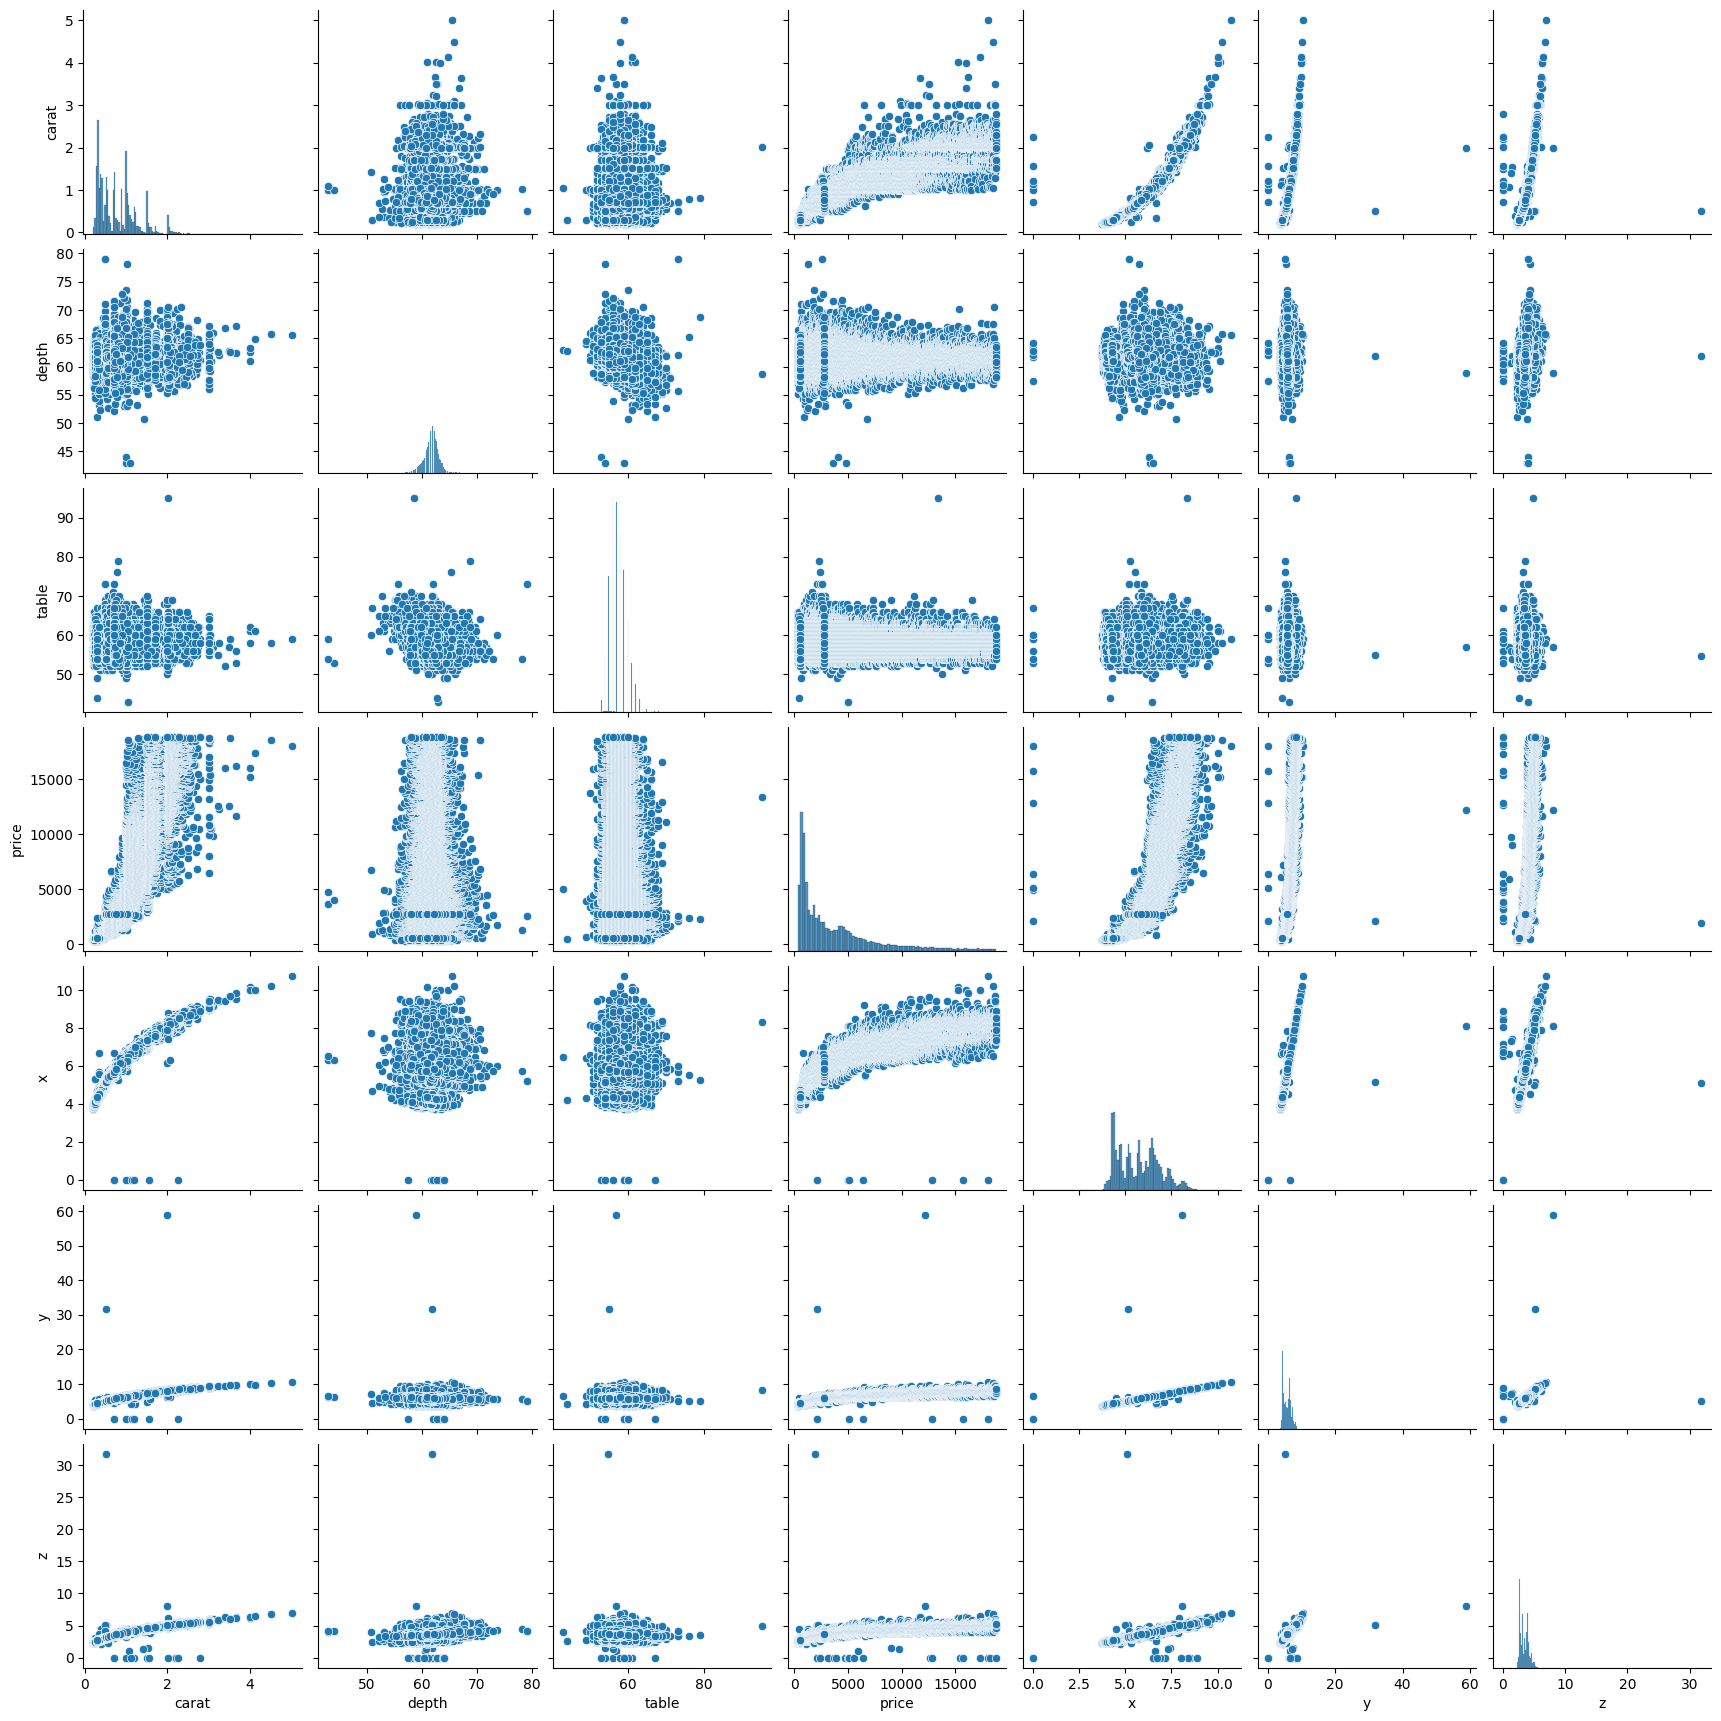

In [3]:
sns.pairplot(data);

Для придания отдельным классам своих цветов необходимо указать, по какому признаку разделяются точки

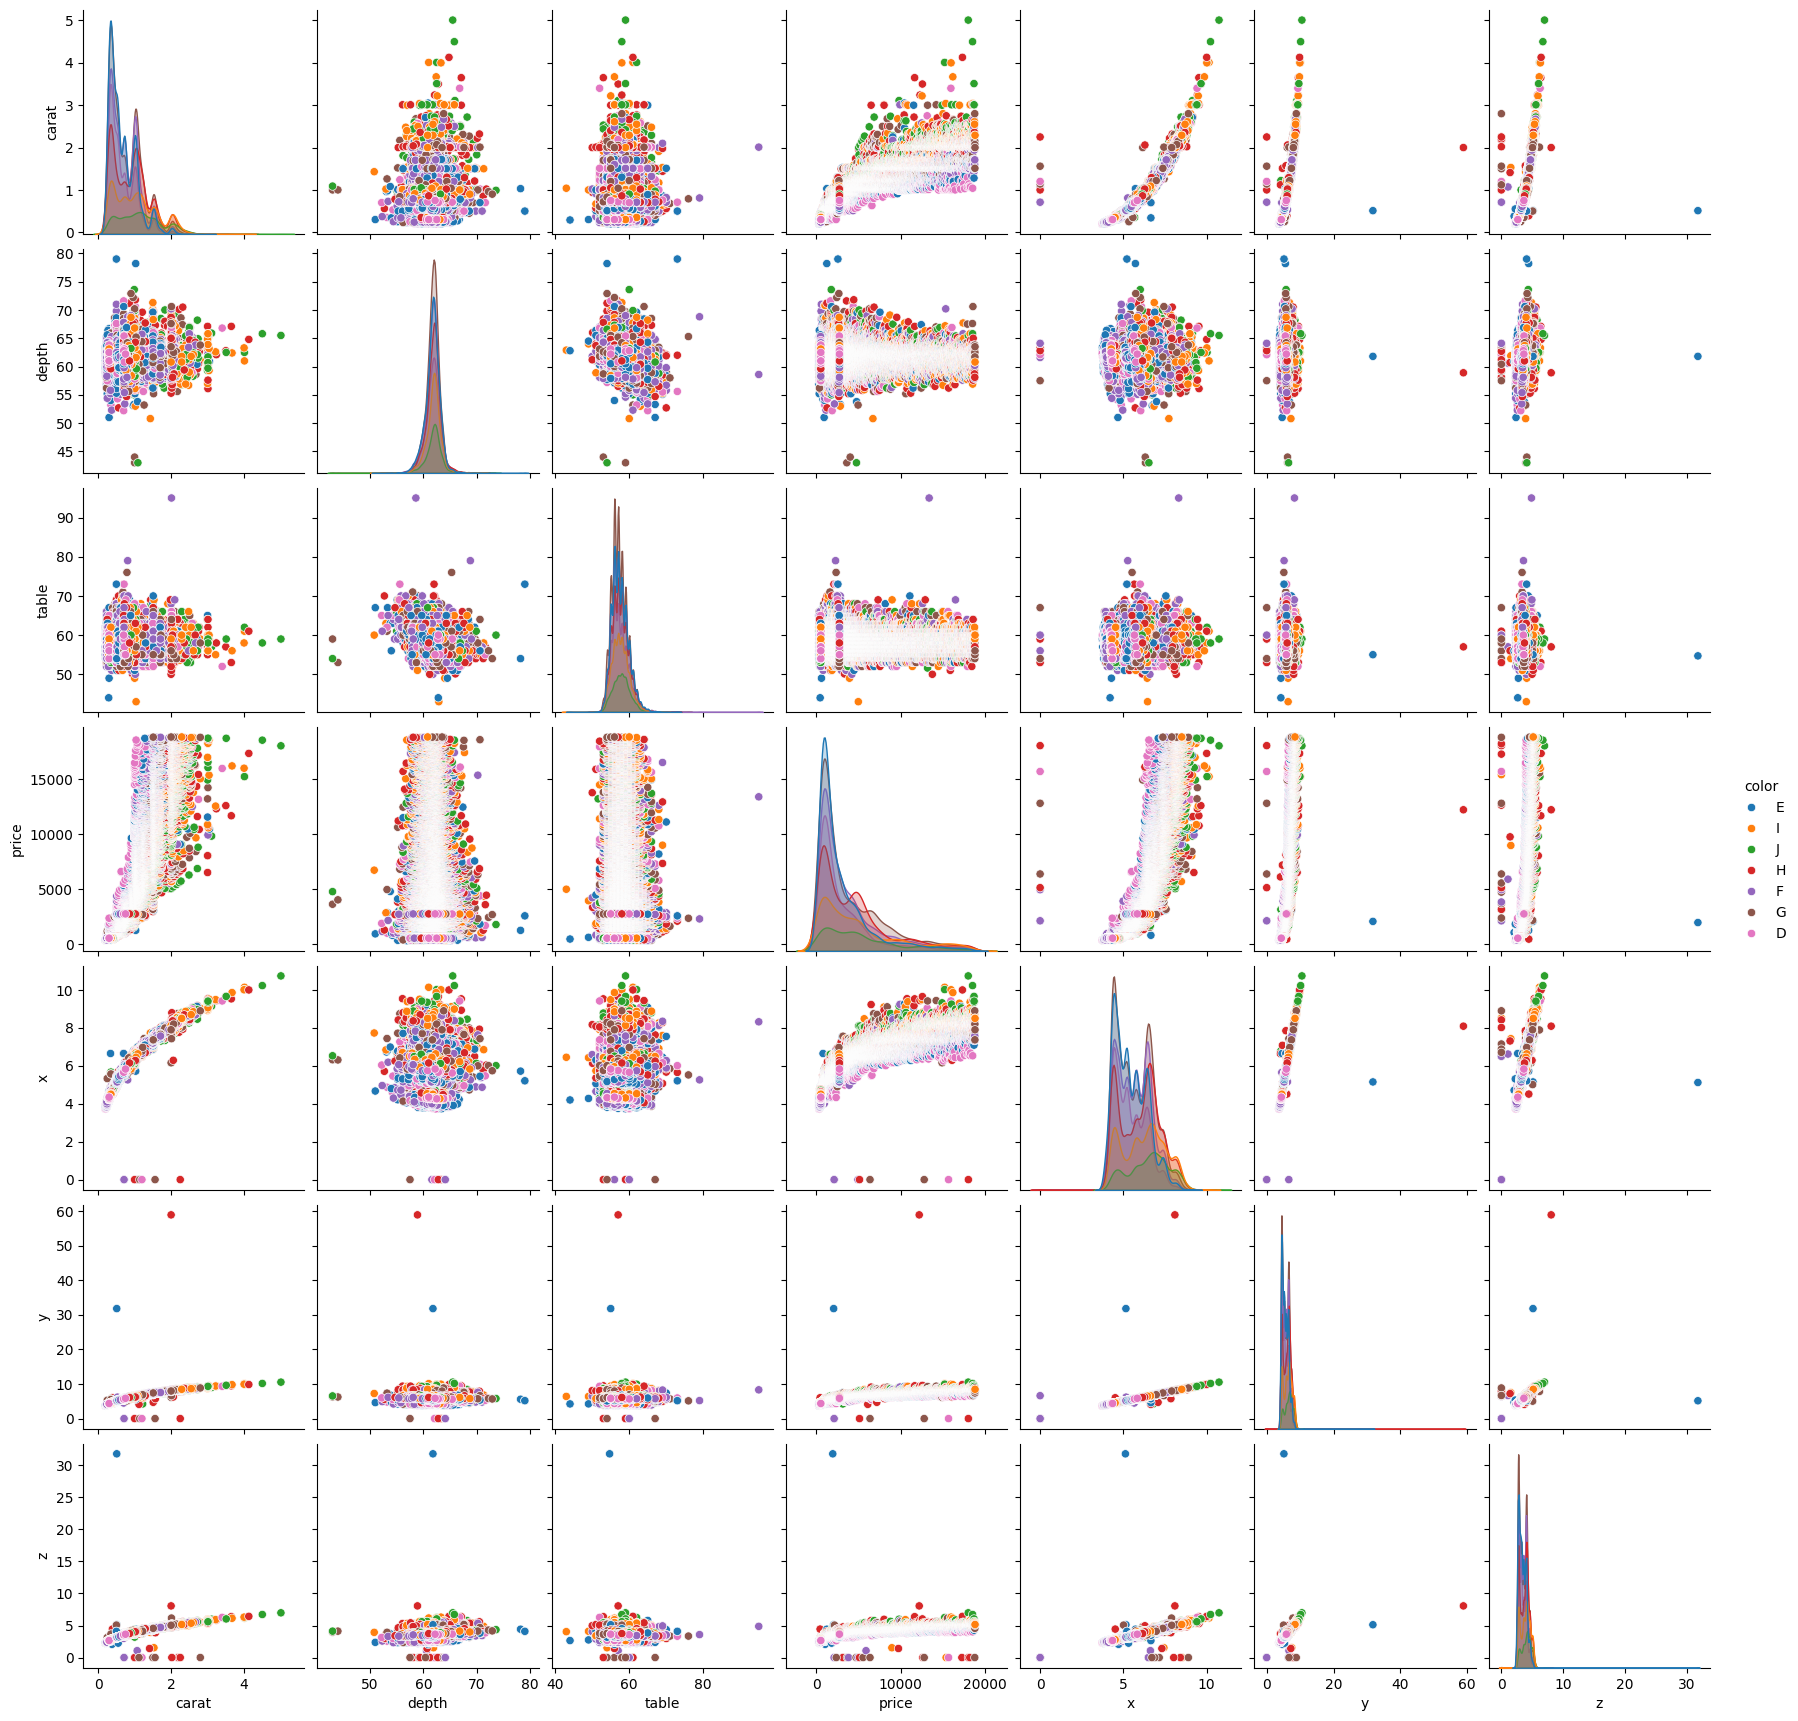

In [44]:
sns.pairplot(data, hue='color');

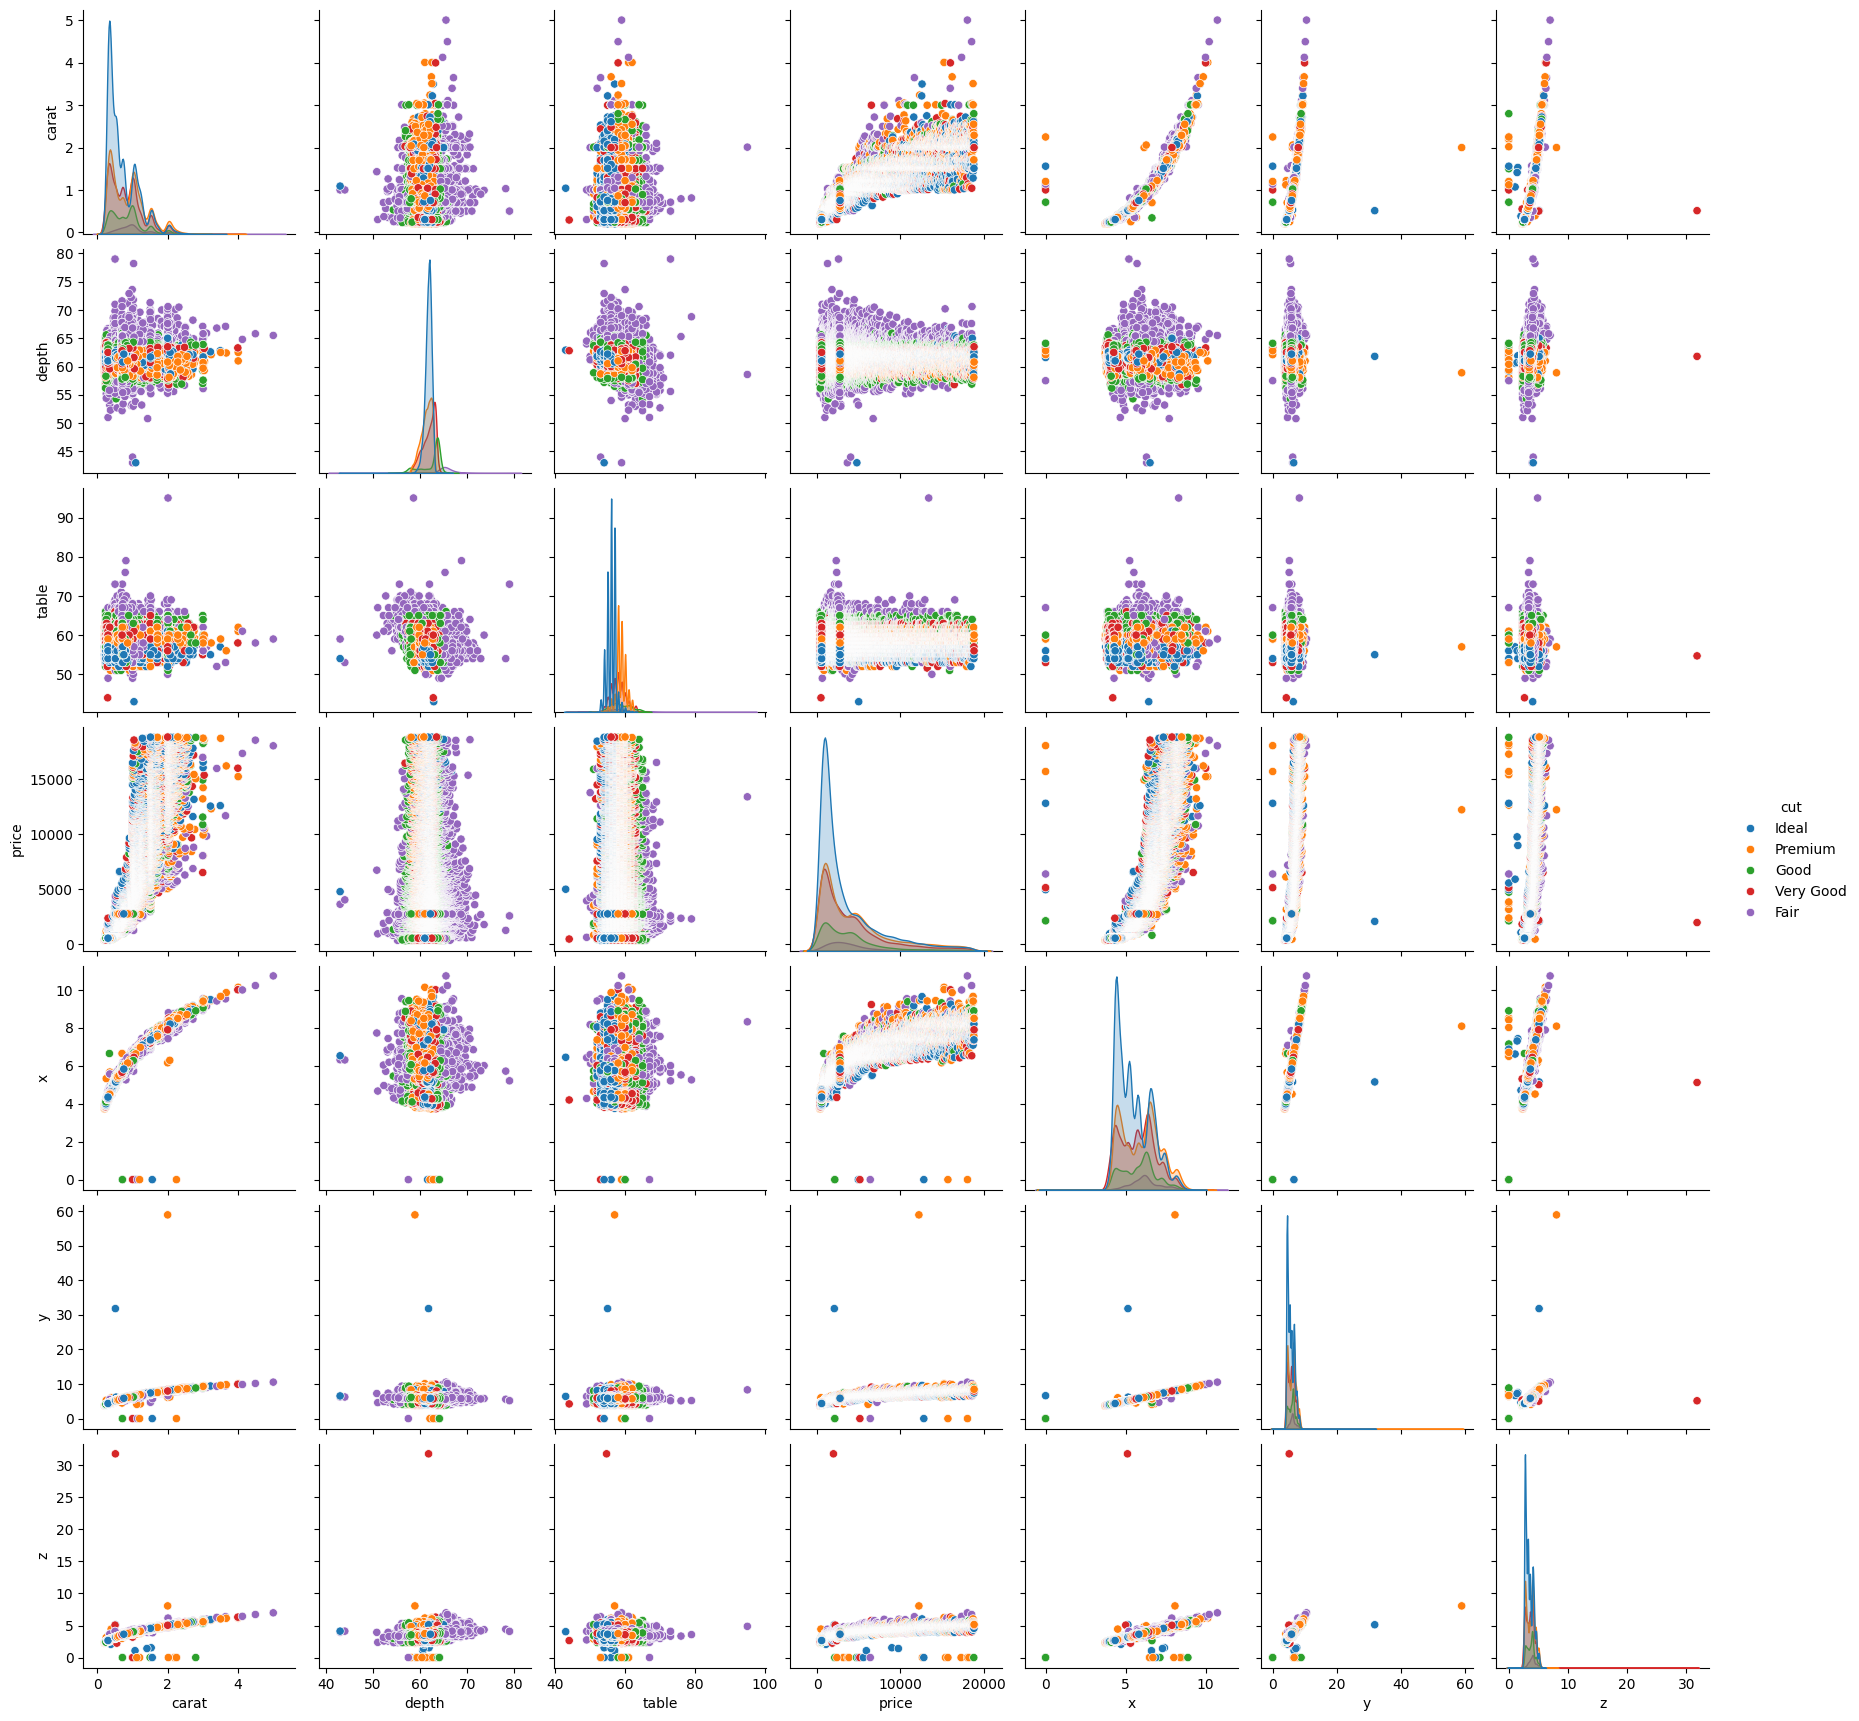

In [45]:
sns.pairplot(data, hue='cut');

### Построение модели

Перейдем к построению модели. Модель метрической классификации должна обеспечивать следующий алгоритм работы: пользователь вводит новое признаковое описание объекта (объект отсутствует в обучающей выборке), а алгоритм классификации выводит приблизительную стоимость.

Существует несколько вариаций метода ближайших соседей. Каждая модель предполагает наличие различных параметров для оптимизации. Воспользуемся библиотекой scikit для построения классификатора

In [8]:
from sklearn.neighbors import KNeighborsClassifier

X_train = data[['x', 'y', 'z', 'depth']].values
y_train = data['price'].values

K = 3 # Количество соседей

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

# Использование классификатора
# Объявление признаков объекта
X_new = np.array([[4.05,4.01,2.72,61.8]])
# Получение ответа для нового объекта
target = knn.predict(X_new)
print(target)

[478]


In [43]:
from sklearn.neighbors import KNeighborsClassifier

X_train = data[['x', 'y', 'z', 'depth']].values
y_train = data['price'].values

K = 1 # Количество соседей

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

# Использование классификатора
# Объявление признаков объекта
X_new = np.array([[4.05,4.01,2.72,61.8]])
# Получение ответа для нового объекта
target = knn.predict(X_new)
print(target)

[478]


In [9]:
from sklearn.neighbors import KNeighborsClassifier

X_train = data[['x', 'y', 'z', 'depth']].values
y_train = data['price'].values

K = 10 # Количество соседей

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

# Использование классификатора
# Объявление признаков объекта
X_new = np.array([[4.05,4.01,2.72,61.8]])
# Получение ответа для нового объекта
target = knn.predict(X_new)
print(target)

[377]


Модель построена и выдает ответ для новых (отсутствующих в исходной выборке) объектов. Но, анализируя используемый код, следует отметить следующие недостатки такого подхода:

* в качестве количества ближайших соседей выбрано значение K=3, выбор данного значения не обосновывается, но в данном методе именно данный параметр должен оптимизироваться;
* отсутствует какое-либо графическое представление модели, нет визуализации процесса принятия решения.

Исправим данные недостатки. Займемся обоснованием выбора оптимального значения количества ближайших соседей. Для этого будем использовать простейшую оценку качества hold-out.

### Hold-out

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = train_test_split(
    data[
    ['x',
     'y',
     'z',
     'depth']], 
    data['price'], 
    test_size=0.3, 
    random_state=17)

K = 3 # Количество соседей
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print('accuracy: ', accur)

accuracy:  0.011308861698183166


In [22]:
K = 10 # Количество соседей
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print('accuracy: ', accur)

accuracy:  0.013657149919663825


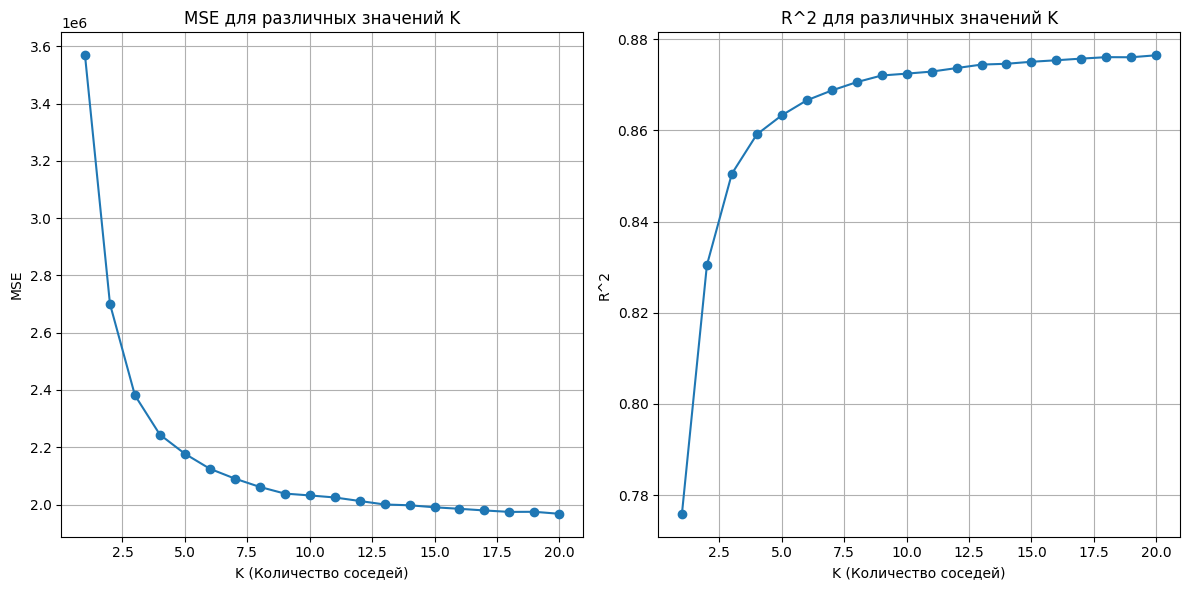

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Разделение данных на тренировочный и тестовый набор
X_train, X_holdout, y_train, y_holdout = train_test_split(
    data[
        ['x',
         'y',
         'z',
         'depth']
    ], 
    data['price'], 
    test_size=0.3, 
    random_state=17
)

# Создание списков для записи MSE и R^2 и значений K
mse_values = []
r2_values = []
k_values = range(1, 21)  # Диапазон значений K, можно изменить по вашим требованиям

# Обучение модели и запись MSE и R^2 для разных K
for K in k_values:
    knn = KNeighborsRegressor(n_neighbors=K)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_holdout)
    mse = mean_squared_error(y_holdout, knn_pred)
    r2 = r2_score(y_holdout, knn_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Построение графиков MSE и R^2 от значения K
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('MSE для различных значений K')
plt.xlabel('K (Количество соседей)')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, r2_values, marker='o', linestyle='-')
plt.title('R^2 для различных значений K')
plt.xlabel('K (Количество соседей)')
plt.ylabel('R^2')
plt.grid(True)

plt.tight_layout()
plt.show()


Метрики регрессии: среднеквадратичная ошибка (Mean Squared Error, MSE) или коэффициент детерминации (R^2). 

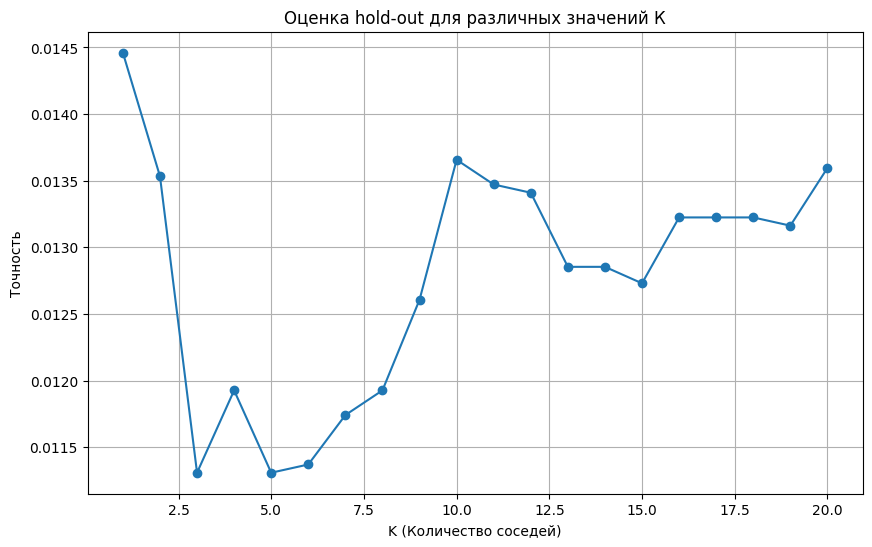

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Разделение данных на тренировочный и тестовый набор
X_train, X_holdout, y_train, y_holdout = train_test_split(
    data[
        ['x',
         'y',
         'z',
         'depth']
    ], 
    data['price'], 
    test_size=0.3, 
    random_state=17
)

# Создание списков для записи точностей и значений K
accuracies = []
k_values = range(1, 21)  # Диапазон значений K, можно изменить по вашим требованиям

# Обучение модели и запись точностей для разных K
for K in k_values:
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_holdout)
    accur = accuracy_score(y_holdout, knn_pred)
    accuracies.append(accur)

# Построение графика точности от значения K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Оценка hold-out для различных значений К')
plt.xlabel('K (Количество соседей)')
plt.ylabel('Точность')
plt.grid(True)
plt.show()


### Еще одна оценка качества – cross validation (CV) error.

C:\Users\Dns\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dns\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dns\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dns\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dns\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dns\miniconda3\lib\si

C:\Users\Dns\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dns\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dns\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dns\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dns\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dns\miniconda3\lib\si

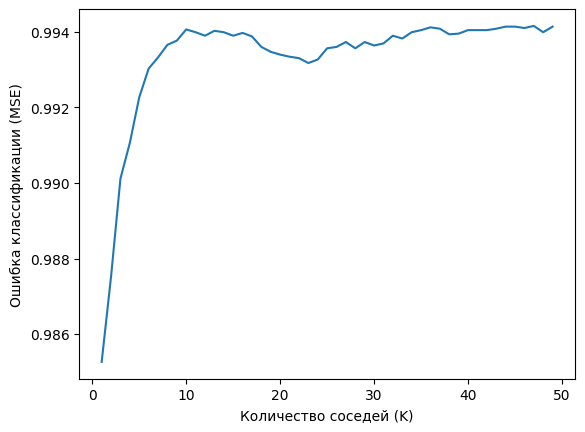

Оптимальные значения K: [1]


In [29]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Значения параметра K
k_list = list(range(1, 50))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(
        knn, 
        data[['carat', 'depth', 'table', 'x', 'y', 'z']],  # Выберите нужные столбцы из данных
        data['price'],  # Замените 'price' на целевую переменную в вашем наборе данных
        cv=10, 
        scoring='accuracy'
    )
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1 - x for x in cv_scores]

# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)')
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
k_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])

# Печатаем все K, оптимальные для модели
print('Оптимальные значения K:', all_k_min)


Визуализируем полученные результаты

### Использование модели

In [48]:
from sklearn.neighbors import KNeighborsRegressor

X_train = data[['carat', 'depth', 'table', 'x']].values
y_train = data['price'].values

K = 1 # Найденное оптимальное значение соседей

# Создание и настройка классификатора
knn = KNeighborsRegressor(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

# Использование классификатора
# Объявление признаков объекта

carat = float(input('Караты: '))
depth = float(input('Глубина: '))
table = float(input('Таблица: '))
x = float(input('Х: '))
X_new = np.array([[carat, depth, table, x]])

# Получение ответа для нового объекта
target = knn.predict(X_new)

print('\nДанный бриллиант стоит: ', target)

Караты: 0.23	
Глубина: 61.5
Таблица: 55.0
Х: 3.95

Данный бриллиант стоит:  [326.]


### Контрольные вопросы

1. Поясните особенности основных методов метрической классификации: метод ближайшего соседа, метод k ближайших соседей.

Метрическая классификация - это метод классификации, который опирается на сходство между объектами. Основные методы метрической классификации включают метод ближайшего соседа и метод k ближайших соседей. Вот их особенности:

**Метод ближайшего соседа (1-NN):**

* Для классификации объекта он анализирует его ближайшего соседа в обучающей выборке.
* Классификация происходит путем отнесения объекта к классу его ближайшего соседа.
* Основной недостаток - чувствительность к выбросам, так как один неправильно размеченный объект в обучающей выборке может сильно повлиять на результат.

**Метод k ближайших соседей (k-NN):**

* Как и метод ближайшего соседа, k-NN анализирует сходство объектов в обучающей выборке для классификации.
* Однако вместо одного ближайшего соседа, он рассматривает k ближайших соседей.
* Классификация выполняется путем голосования среди k соседей, и объект присваивается классу, который наиболее часто встречается среди этих соседей.
* Этот метод менее чувствителен к выбросам и может уменьшить влияние шума в данных.
* Выбор оптимального значения k - это важный аспект этого метода. Слишком маленькие k могут привести к переобучению, тогда как слишком большие k могут сгладить границы классов.

----------------------------------------------------------------------------------------------------------------------------

2. Поясните основные принципы и этапы реализации метода kNN.

**Метод k-NN (k ближайших соседей)** - это метод машинного обучения, который использует близость объектов в пространстве признаков для классификации или регрессии новых данных. Вот основные принципы и этапы реализации метода k-NN:

**Принципы:**

1. **Близость объектов:** Метод основан на гипотезе, что похожие объекты имеют похожие целевые переменные. Если объект похож на k ближайших соседей из обучающей выборки, то можно предположить, что он также принадлежит к тому же классу (в случае классификации) или имеет похожее значение целевой переменной (в случае регрессии).

2. **Гиперпараметр k:** Основной гиперпараметр метода - это k, количество ближайших соседей, которые будут использоваться для классификации или регрессии новых данных. Выбор правильного значения k может оказать существенное влияние на качество модели.

**Этапы реализации:**

1. **Загрузка данных:** Сначала загружаются обучающие данные, которые содержат признаки и соответствующие им целевые переменные.

2. **Предобработка данных:** Осуществляется предобработка данных, такая как нормализация признаков, обработка пропущенных значений и т. д.

3. **Выбор метрики:** Определяется метрика (расстояние), которая будет использоваться для измерения близости между объектами. Наиболее распространенной является евклидова метрика, но существует множество других, включая манхэттенскую, косинусную, корреляционную и другие.

4. **Выбор гиперпараметра k:** Выбирается значение k (количество соседей), обычно на основе кросс-валидации. Значение k может варьироваться от 1 до нескольких десятков в зависимости от данных.

5. **Обучение модели:** Модель обучается на обучающих данных, и для каждого нового объекта вычисляются расстояния до всех объектов обучающей выборки.

6. **Выбор класса или значения целевой переменной:** Для каждого нового объекта выбираются k ближайших соседей, и на основе их классов (в случае классификации) или значений целевой переменной (в случае регрессии) принимается решение.

7. **Классификация или регрессия:** В случае классификации выбирается класс, представленный наибольшим числом среди k ближайших соседей. В случае регрессии вычисляется среднее значение целевых переменных среди k ближайших соседей.

8. **Оценка модели:** Оценивается качество модели на тестовых данных с использованием метрик, таких как точность, F1-мера, среднеквадратичная ошибка и другие.

9. **Тюнинг гиперпараметра k:** Модель может быть донастроена, чтобы найти оптимальное значение k и достичь лучшей производительности.

10. **Использование модели:** После настройки модели можно использовать ее для классификации или регрессии новых данных.

------------------------------------------------------------------------------------------------------------------------------

3. Поясните принцип выбора количества соседних объектов, по которым определяется принадлежность целевого объекта к результирующему классу.

Выбор количества соседних объектов (значения k) в методе k-Nearest Neighbors (k-NN) является важным аспектом этого алгоритма, и он влияет на его производительность. Принцип выбора оптимального значения k может быть описан следующим образом:

1. **Маленькое k:**
   - При k=1, модель будет более гибкой и склонной к переобучению. Это означает, что она будет слишком чувствительной к шуму в данных.
   - Маленькое k хорошо работает в случаях, когда данные действительно хорошо структурированы и шум в данных минимален.

2. **Большое k:**
   - При больших значениях k, модель становится менее чувствительной к локальным колебаниям в данных и более устойчивой к шуму. Она сглаживает локальные различия.
   - Большое k хорошо работает в случаях, когда данные могут быть менее структурированными или в них присутствует случайный шум.

3. **Выбор оптимального k:**
   - Оптимальное значение k зависит от данных, и его следует выбирать экспериментально. Часто используют метод перекрестной проверки (cross-validation) для определения наилучшего значения k.
   - Можно провести цикл обучения модели с разными значениями k и оценить производительность модели на тестовых данных для каждого k.
   - Затем выбирается значение k, при котором модель достигает наилучшей производительности.

-------------------------------------------------------------------------------------------------------------------------------

4. В чем заключается метод парзеновского окна?

Метод парзеновского окна (или ядерного метода k-ближайших соседей) - это один из методов метрической классификации. Этот метод используется для классификации объектов на основе их сходства с близкими обучающими примерами. Основной принцип метода заключается в том, что объект присваивается классу, который наиболее представлен среди k ближайших соседей, где k - это параметр, задаваемый заранее.

--------------------------------------------------------------------------------------------------------------------------------

5. Назовите, какие параметры оптимизируют в методах kNN?

В методах k-ближайших соседей (kNN) основные параметры, которые могут быть оптимизированы, включают:

1. **Число соседей (k)** 
2. **Функция расстояния (метрика)** 
3. **Ядро (kernel)**
4. **Преобразования данных** 
5. **Веса для соседей** 

Оптимизация этих параметров может улучшить производительность модели kNN и помочь адаптировать ее под конкретную задачу классификации.